This Notebook is based on the dataset compiled and partly preprocessed by Andreas. It comprises years 2010 until 2023 and the entire EU.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [2]:
#df = pd.read_parquet(r'C:\Users\alexa\OneDrive\AlexPerez\Documents\1-Personal\4 Meganplan Cerebral\DataSciensTest\aug24_bds_int---co2\data\processed\EU_all_dtypes_Tan_NaN_float32.parquet')
df=pd.read_parquet(r'C:\Users\alexa\Downloads\EU all_dtypes_Tan_NaN_float32.parquet')

pd.set_option('display.max_columns', None)

#df=pd.read_parquet(r'C:\Users\alexa\Downloads\aug24_bds_int---co2\data\processed\EU_all_dtypes_Tan_NaN_float32.parquet')


display(df.head())
display(df.shape)

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,r,m (kg),Mt,Enedc (g/km),Ewltp (g/km),W (mm),At1 (mm),At2 (mm),Ft,Fm,ec (cm3),ep (KW),z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,ech,RLFI,Electric range (km),#identical occurences
0,280060.0,UK,NaN,NaN,UNKNOWN,UNKNOWN,VAUXHALL,NaN,A-H/MONOCAB,BF11,2A05ASXEGA7,VAUXHALL,ZAFIRA SRI XP 150 CDTI A,M1,NaN,14.0,1613.0,NaN,191.0,NaN,2703.0,1488.0,1512.0,diesel,M,1910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,2010.0,NaN,NaN,NaN,NaN,NaN,1.0
1,280060.0,GB,NaN,NaN,AUDI AG,NaN,AUDI,NaN,B8,LCAKAQ1,QM6B4006R8K927MGEM0,AUDI,S4 T QUATTRO,M1,NaN,3.0,1735.0,NaN,NaN,NaN,NaN,NaN,NaN,petrol,M,2995.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P,2011.0,NaN,NaN,NaN,NaN,NaN,1.0
2,280060.0,PL,NaN,VW GROUP PC,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2001/116*0211*27,1T,CFHCAF,FD6FD62E0187MQS7N1VR0S0,VOLKSWAGEN,TOURAN,M1,NaN,1.0,1629.0,NaN,131.0,NaN,2675.0,1794.0,1794.0,DIESEL,M,1968.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2012.0,NaN,NaN,NaN,NaN,NaN,1.0
3,280060.0,HU,NaN,NaN,HYUNDAI ASSAN,HYUNDAI ASSAN OTOMOTIV SANAYI VE,Hyundai,e11*2007/46*0192*04,ELH,F5D31,M65AZ1,HYUNDAI ASSAN,ix35,M1,NaN,1.0,1500.0,NaN,139.0,NaN,2640.0,1585.0,1586.0,Diesel,M,1685.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2013.0,NaN,NaN,NaN,NaN,NaN,30.0
4,280060.0,HU,NaN,GENERAL MOTORS,OPEL,ADAM OPEL AG,Opel,e1*2007/46*0374*14,0G-A,CAHBC12,BA1N1FMHD5,Opel,Insignia Limousine HB,M1,NaN,4.0,1613.0,NaN,114.0,NaN,2737.0,1587.0,1590.0,Diesel,M,1956.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,P,2014.0,NaN,NaN,NaN,NaN,NaN,1.0


(14442792, 41)

Crude Feature Removal:

1- Missing Values > 80%
2- Variables with probably little influence for future machine modelling (explanation will be given)


In [3]:
# Removal columns with > 80% missing values

total_rows = df.shape[0]
missing_percentage = (df.isnull().sum() / total_rows) * 100
#print(missing_percentage) -->Output: z(Wh/km), Ernedc (g/km), Erwltp (g/km),De, Vf,ech, RLFI, Electric range (km)

#It could be that less values are missing the closer we move to the present. We may need to compare with each year. 


# Get columns with more than 80% missing values
columns_to_drop = missing_percentage[missing_percentage > 80].index

# Drop the columns
df = df.drop(columns_to_drop, axis=1)
print("Columns dropped:", columns_to_drop)
display(df.info())

Columns dropped: Index(['z (Wh/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'ech',
       'RLFI', 'Electric range (km)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442792 entries, 0 to 14442791
Data columns (total 33 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     float32 
 1   Country                category
 2   VFN                    category
 3   Mp                     category
 4   Mh                     category
 5   Man                    category
 6   MMS                    category
 7   Tan                    category
 8   T                      category
 9   Va                     category
 10  Ve                     category
 11  Mk                     category
 12  Cn                     category
 13  Ct                     category
 14  Cr                     category
 15  r                      float32 
 16  m (kg)                 float32 
 17  Mt                     flo

None

In [ ]:
# Removal of columns, which by first inspection will not contribute to the ML phase. Explanation provided in an extra doc.

In [4]:
#display(df.head(5))

In [5]:
# Inspecting Mp, Mh, Man, and Mk variables, which give the same info(name of manufacturer). The one with the less NANs will be retain.
# Variable Mh will be retained and Mp, Man, MMS and Mk will be discarded.

# Calculate total rows
total_rows = df.shape[0]

# Calculate missing percentage for each column
missing_percentage_mp = (df['Mp'].isnull().sum() / total_rows) * 100
missing_percentage_mh = (df['Mh'].isnull().sum() / total_rows) * 100
missing_percentage_man = (df['Man'].isnull().sum() / total_rows) * 100
missing_percentage_MMS = (df['MMS'].isnull().sum() / total_rows) * 100
missing_percentage_mk = (df['Mk'].isnull().sum() / total_rows) * 100

# Print the results
print("Missing percentage for Mp:", missing_percentage_mp)
print("Missing percentage for Mh:", missing_percentage_mh)
print("Missing percentage for Man:", missing_percentage_man)
print("Missing percentage for MMS:", missing_percentage_MMS)
print("Missing percentage for Mk:", missing_percentage_mk)

Missing percentage for Mp: 10.65207475119769
Missing percentage for Mh: 0.0
Missing percentage for Man: 2.1517169256470634
Missing percentage for MMS: 41.877526173609645
Missing percentage for Mk: 0.29708937163950017


In [6]:
# Removal of columns: Mp,Man, MMS and Mk

df = df.drop(['Mp', 'Man', 'MMS', 'Mk'], axis=1)


In [8]:
# Checking percentage of missing values for the remaining the columns

total_rows = df.shape[0]
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100

# Print the results
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
ID                        0.000000
Country                   0.000000
VFN                      41.697914
Mh                        0.000000
Tan                       3.396455
T                         0.429536
Va                        0.695738
Ve                        1.559415
Cn                        0.341831
Ct                        0.170943
Cr                       19.463328
r                         0.000028
m (kg)                    0.097453
Mt                       26.331356
Enedc (g/km)             37.850652
Ewltp (g/km)             24.687734
W (mm)                   15.593183
At1 (mm)                 17.470348
At2 (mm)                 18.960551
Ft                        0.046314
Fm                        0.558604
ec (cm3)                  4.250529
ep (KW)                   9.703242
IT                       66.220119
Status                    0.000000
year                      0.000000
Date of registration     63.747100
Fuel consumpti

In [9]:
# I have checked what year shows the most missing values. It is 2010. But removing it, does not make a great difference. 
# Removing columns with 25% of missing data


total_rows = df.shape[0]
missing_percentage = (df.isnull().sum() / total_rows) * 100
columns_to_drop = missing_percentage[missing_percentage > 25].index
df = df.drop(columns_to_drop, axis=1)

print("Columns dropped:", columns_to_drop)
display(df.info())


Columns dropped: Index(['VFN', 'Mt', 'Enedc (g/km)', 'IT', 'Date of registration',
       'Fuel consumption '],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442792 entries, 0 to 14442791
Data columns (total 23 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     float32 
 1   Country                category
 2   Mh                     category
 3   Tan                    category
 4   T                      category
 5   Va                     category
 6   Ve                     category
 7   Cn                     category
 8   Ct                     category
 9   Cr                     category
 10  r                      float32 
 11  m (kg)                 float32 
 12  Ewltp (g/km)           float32 
 13  W (mm)                 float32 
 14  At1 (mm)               float32 
 15  At2 (mm)               float32 
 16  Ft                     category
 17  Fm                     category
 18  ec (cm

None

In [10]:
#Display of category and % of missing values  

total_rows = df.shape[0]
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100
results_df = pd.DataFrame({'Column Type': df.dtypes, 'Missing Percentage': missing_percentage})

# Print the results
print(results_df)

                      Column Type  Missing Percentage
ID                        float32            0.000000
Country                  category            0.000000
Mh                       category            0.000000
Tan                      category            3.396455
T                        category            0.429536
Va                       category            0.695738
Ve                       category            1.559415
Cn                       category            0.341831
Ct                       category            0.170943
Cr                       category           19.463328
r                         float32            0.000028
m (kg)                    float32            0.097453
Ewltp (g/km)              float32           24.687734
W (mm)                    float32           15.593183
At1 (mm)                  float32           17.470348
At2 (mm)                  float32           18.960551
Ft                       category            0.046314
Fm                       cat

From here on, several different attempts to deal with remaining missing values will be tested.

1 - Columns with a small percentage of missing values: 'Tan', 'T', 'Va','Ve', 'Cn','Ct', 'Ft', 'Fm', 'ec (cm3)'
2 - Imputation by numeric variables with higher percentage of missing values (except the target variable Ewltp): W (mm), At1 (mm), At2 (mm), ec (cm3),ep (KW) 
3 - Open for categorical variables with higher percentage of misssing values: Cr
4 - Pending, numeric target variable: Ewltp   

* Pending: Unique values regarding redundant member states  number

In [15]:
# Drop rows with small % of missing values
df = df.dropna(subset=['Tan', 'T', 'Va','Ve', 'Cn','Ct', 'Ft', 'Fm', 'ec (cm3)'])

# Imputation by mean seems to be appropiate for axle measurements in passenger cars
# W (mm) - Wheelbase is the distance between the front and rear axles of a vehicle. It's a crucial measurement that significantly affects a vehicle's handling, ride comfort, and interior space.
# Axle width: Distance between the left and right wheels on an axle. It's an important factor in passenger vehicle design, affecting several aspects of performance and handling
# At1 (mm) - Axle width steering axle: This refers to the distance between the left and right wheels on the front axle, which is responsible for steering the vehicle.
# At2 (mm)- Axle width other axle: This refers to the distance between the left and right wheels on the rear axle.


df['W (mm)'] = df['W (mm)'].fillna(df['W (mm)'].mean())
df['At1 (mm)'] = df['At1 (mm)'].fillna(df['At1 (mm)'].mean())
df['At2 (mm)'] = df['At2 (mm)'].fillna(df['At2 (mm)'].mean())





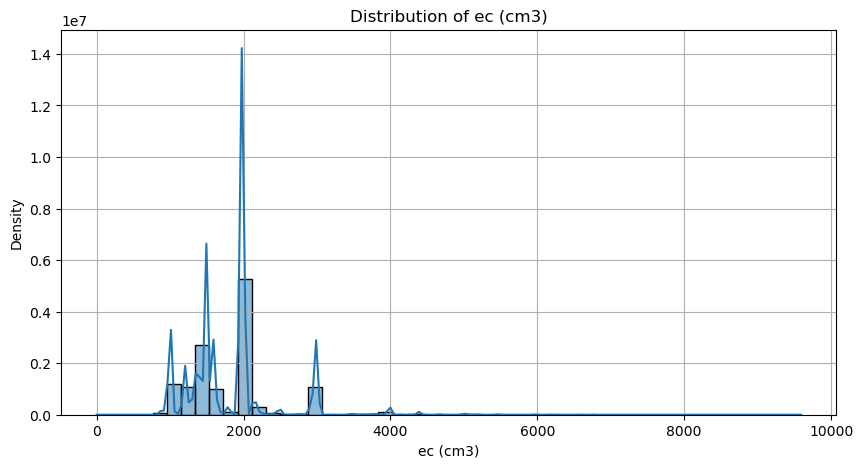

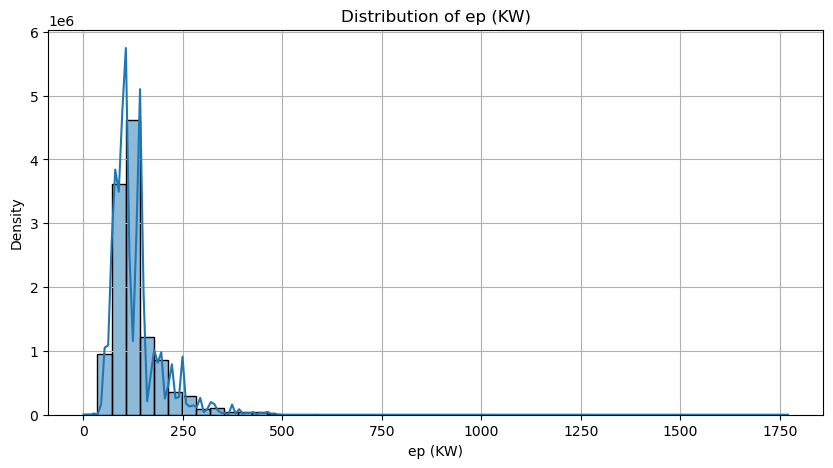

In [14]:
#Checking the distribution of Ec and Ep, in order to decide which technique for replacing values by imputation. Rule: if it seems normal dis. use mean. If skewed, use median. 


# Plot the distribution of 'ec (cm3)'
plt.figure(figsize=(10, 5))
sns.histplot(df['ec (cm3)'], kde=True, bins=50)
plt.title('Distribution of ec (cm3)')
plt.xlabel('ec (cm3)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot the distribution of 'ep (KW)'
plt.figure(figsize=(10, 5))
sns.histplot(df['ep (KW)'], kde=True,bins=50)
plt.title('Distribution of ep (KW)')
plt.xlabel('ep (KW)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [16]:
# Imputation by median seems to be appropiate for engine capacity (Ec) and engine power (Ep). First rudimentary visualizations showed that the data is heavily skewed) 

df['ec (cm3)'] = df['ec (cm3)'].fillna(df['ec (cm3)'].median())
df['ep (KW)'] = df['ep (KW)'].fillna(df['ep (KW)'].median())



Now, what to do with: 

3 - Open for categorical variables with higher percentage of misssing values: Cr (19% of missing values)?
4 - Pending, numeric target variable: Ewltp (25% of missing values)?


In [17]:
#Attempt drop rows missing the values and see if it reduces the dataframe too heavily

# Drop rows with missing values in specified columns
df = df.dropna(subset=['Cr', 'Ewltp (g/km)'])

# Check if the DataFrame has decreased significantly
original_shape = df.shape[0]
new_shape = df.dropna().shape[0]

# Calculate the percentage of rows dropped
percentage_dropped = ((original_shape - new_shape) / original_shape) * 100

print("Percentage of rows dropped:", percentage_dropped)

Percentage of rows dropped: 0.001892311772581383


In [21]:
#Checking the current status of the df

total_rows = df.shape[0]
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100
results_df = pd.DataFrame({'Column Type': df.dtypes, 'Missing Percentage': missing_percentage})

print(results_df)
print(df.shape)

#the df is cleaned up and still with enough data (1.019.9165 rows) to run a ml model.

                      Column Type  Missing Percentage
ID                        float32            0.000000
Country                  category            0.000000
Mh                       category            0.000000
Tan                      category            0.000000
T                        category            0.000000
Va                       category            0.000000
Ve                       category            0.000000
Cn                       category            0.000000
Ct                       category            0.000000
Cr                       category            0.000000
r                         float32            0.000000
m (kg)                    float32            0.001892
Ewltp (g/km)              float32            0.000000
W (mm)                    float32            0.000000
At1 (mm)                  float32            0.000000
At2 (mm)                  float32            0.000000
Ft                       category            0.000000
Fm                       cat

In [24]:
# Finally, checking for redundancies in the column countries.
# There are not redundant names. Total of 30 countries

#for country in df['Country'].unique():
    #print(country)

# There are not

#FR: France
#IT: Italy
#BE: Belgium
#DE: Germany
#CZ: Czech Republic
#DK: Denmark
#SK: Slovakia
#FI: Finland
#LT: Lithuania
#HU: Hungary
#ES: Spain
#PL: Poland
#PT: Portugal
#EE: Estonia
#GB: United Kingdom
#GR: Greece
#LV: Latvia
#AT: Austria
#BG: Bulgaria
#LU: Luxembourg
#SI: Slovenia
#IE: Ireland
#NL: Netherlands
#IS: Iceland
#MT: Malta
#NO: Norway
#RO: Romania
#SE: Sweden
#HR: Croatia
#CY: Cyprus


In [30]:
# Renaming the cleaned-up df and dropping the provisional column 'identical occurences' created by Andreas.
AllEU30 = df.drop(['#identical occurences'], axis = 1)

# Saving AlleEU30 to a file and start working in a new fresh notebook

AllEU30.to_pickle('AllEU30.pkl')

Next steps:

1- Standardization of num variables
2- Encoding cat variables

3- Visualization num variables
4- Visualization cat variables

It will be perfomred in the next notebook
